# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


In [1]:
#copied from Week3_MNIST_TF.ipynb

import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images=train_images/255.0
test_images=test_images/255.0

2.6.0
11501568/11490434 [==============================] - 8s 1us/step


# Task 1 Shape of arrays
In *Week4_ConvolutionalNeuralNetwork.ipynb* each image was in colour and had shape (32,32,3). The 3 refered to red, green and blue values to reproduce the colour. 
<p>For the MNIST dataset, the shape of the images needed to be changed from (28,28) to (28,28,1). The one refers to images being black/ white not colour. A google search provided the following link:

<p> https://victorzhou.com/blog/keras-cnn-tutorial/

This recommended using np.expand_dims function

In [ ]:
#In Week4_ConvolutionalNeuralNetwork.ipynb input shape was (32, 32, 3). Here we need (28,28,1)
#Copied from https://victorzhou.com/blog/keras-cnn-tutorial/
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Task 1 Model
The single convolution layer used was adapted from *Week4_ConvolutionalNeuralNetwork.ipynb*. It used the same kernal shape (3,3) and *relu* activation function. 
<p>Input shape was adapted to (28,28,1) to fit the MNIST images
<p>No pooling layer was added at this stage.
<p>A single layer of 128 neurons was added as used in *Week3_MNIST_TF.ipynb*

In the description of the models for comparison of results, the following will be listed:
<p>Conv (f,(x,x)): convolution layer with f features and kernal shape (x,x)
<p>Pool (y,y): pooling layer with scaling factors (y,y)
<p>Hidden (z): hidden layer with z nodes, dense unless stated
<p>Flatten() and final layer of 10 nodes won't be mentioned as always the same.

Layers will be listed in order so this model is:
Conv (28,(3,3)), Hidden (128)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))#copied from Week3_MNIST_TF.ipynb
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
flatten (Flatten)            (None, 18928)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2422912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,424,482
Trainable params: 2,424,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#copied from Week4_ConvolutionalNeuralNetwork.ipynb
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1353 - accuracy: 0.9594 - val_loss: 0.0757 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0541 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0752 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0586 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0734 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0696 -

313/313 - 2s - loss: 0.0858 - accuracy: 0.9826


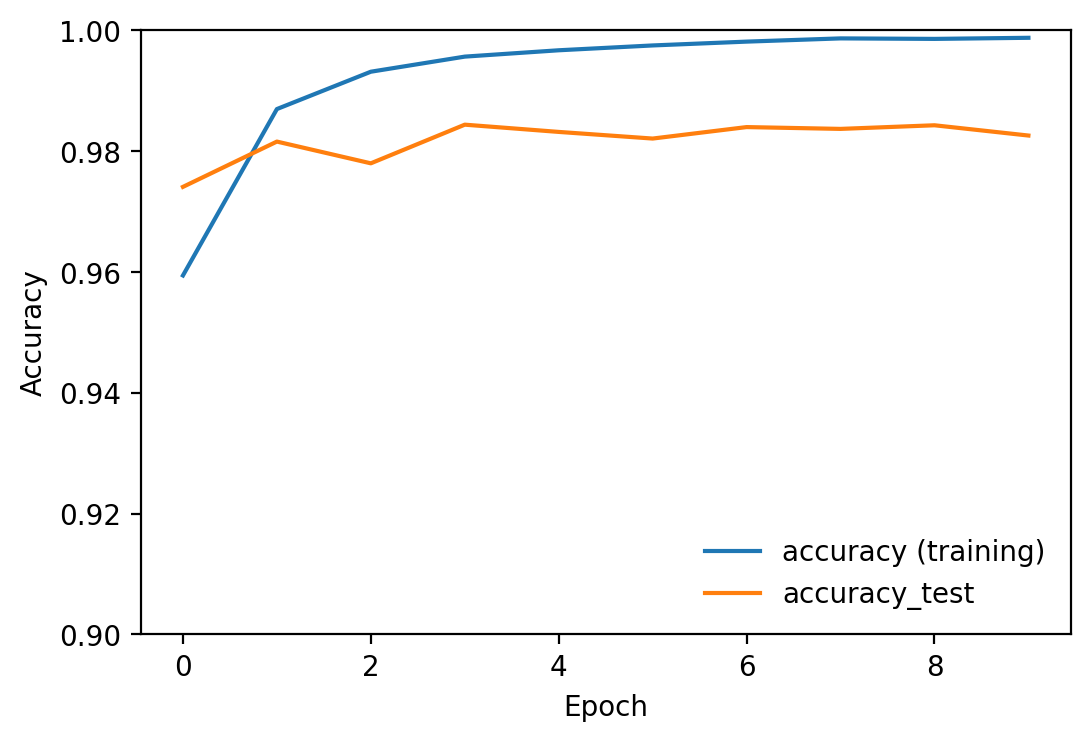

In [ ]:
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 1
M1. Conv (28,(3,3)), Hidden (128): test accuracy: 98.26%, parameters: 2,424,482 

Performance was high with just one convolational layer and one hidden layer when compared to week 3 exercise.
<p>Problem was the time it takes and the number of trainable parameters is massive at over 2 million. 
<p>The task specifies that only one convolution layer can be used, it looks like a pooling layer should be added to reduce the number of trainable parameters. Also the number of neurons in the hidden layer has been reduced to 64 in the next model.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((3, 3)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 28)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                114752    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 115,682
Trainable params: 115,682
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1958 - accuracy: 0.9425 - val_loss: 0.0909 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0556 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0518 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0493 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0441 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0457 -

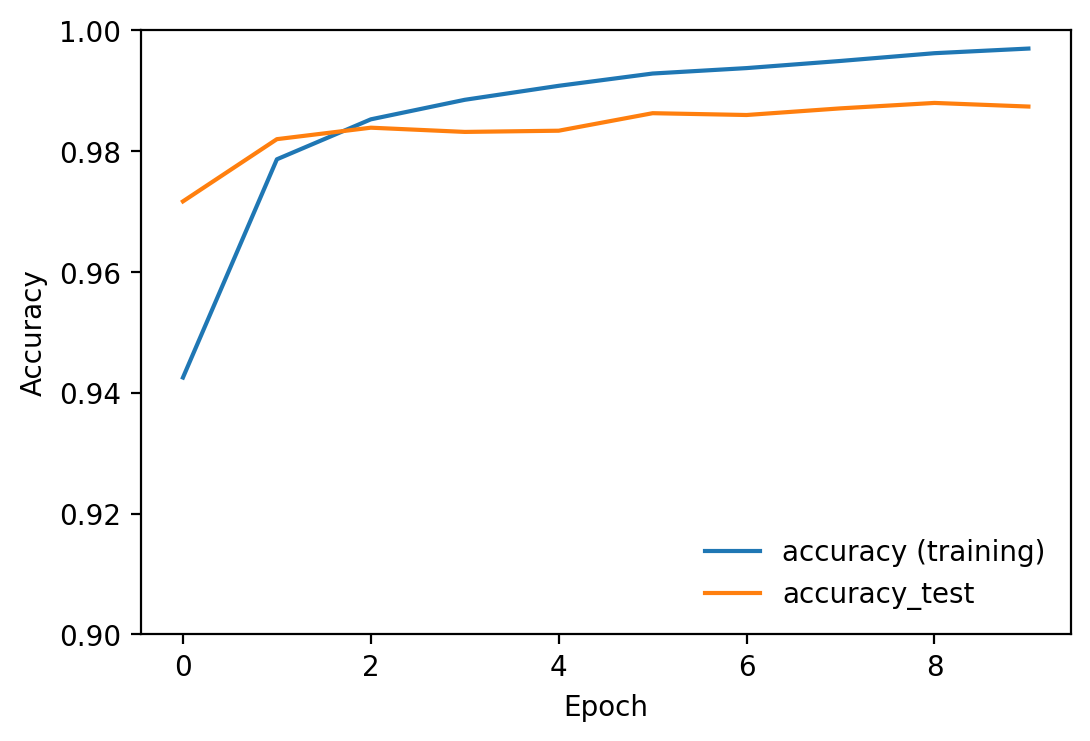

In [ ]:

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 1
M1. Conv (28(3,3)), Hidden (128): test accuracy: 98.26%, parameters: 2,424,482 
<p>M2. Conv (28,3,3)), Pool (3,3), Hidden (64): test accuracy: 98.74%, parameters: 115,682

Better performance, simpler network in terms of number of parameters. 
<p> Now try to optimise on kernal size. Try (4,4)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 28)        476       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                114752    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 115,878
Trainable params: 115,878
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1827 - accuracy: 0.9450 - val_loss

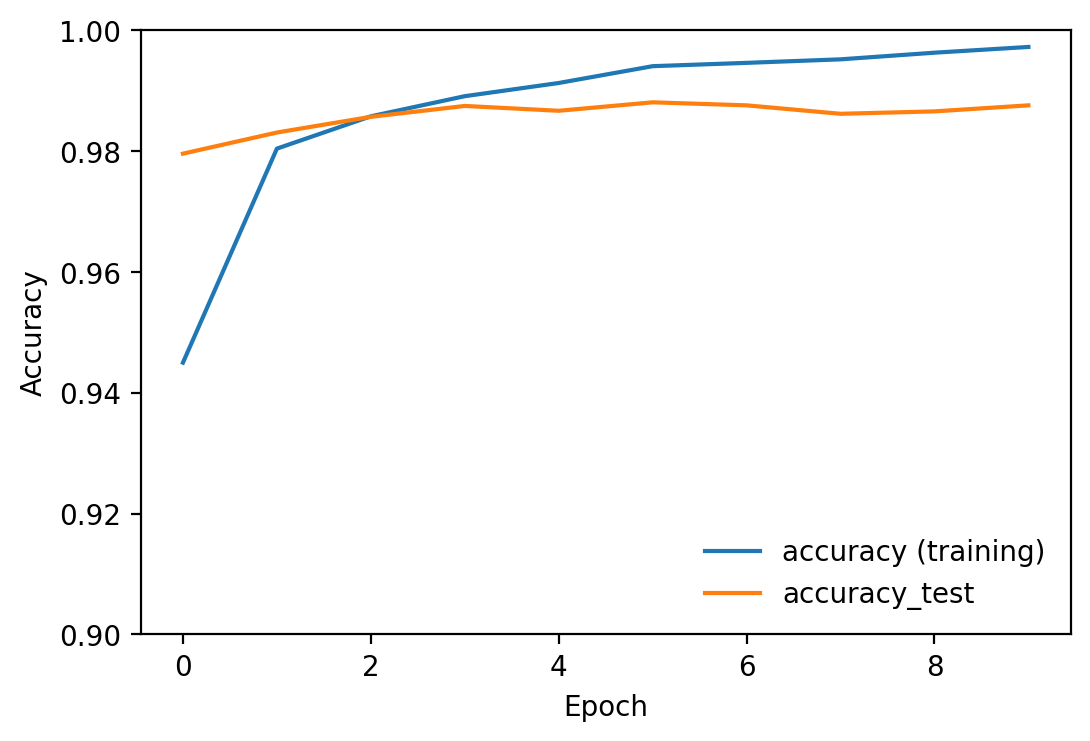

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((3, 3)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)



#Task 1
<p>M2. Conv (28,(3,3)), Pool (3,3), Hidden (64): test accuracy: 98.74%, parameters: 115,682
<p>M3. Conv (28,(4,4)), Pool (3,3), Hidden (64): test accuracy: 98.76%, parameters: 115,878

Slight improvement in performance, try kernel (6,6)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 28)        1036      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1372)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                87872     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 89,558
Trainable params: 89,558
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1578 - accuracy: 0.9536 - val_loss: 

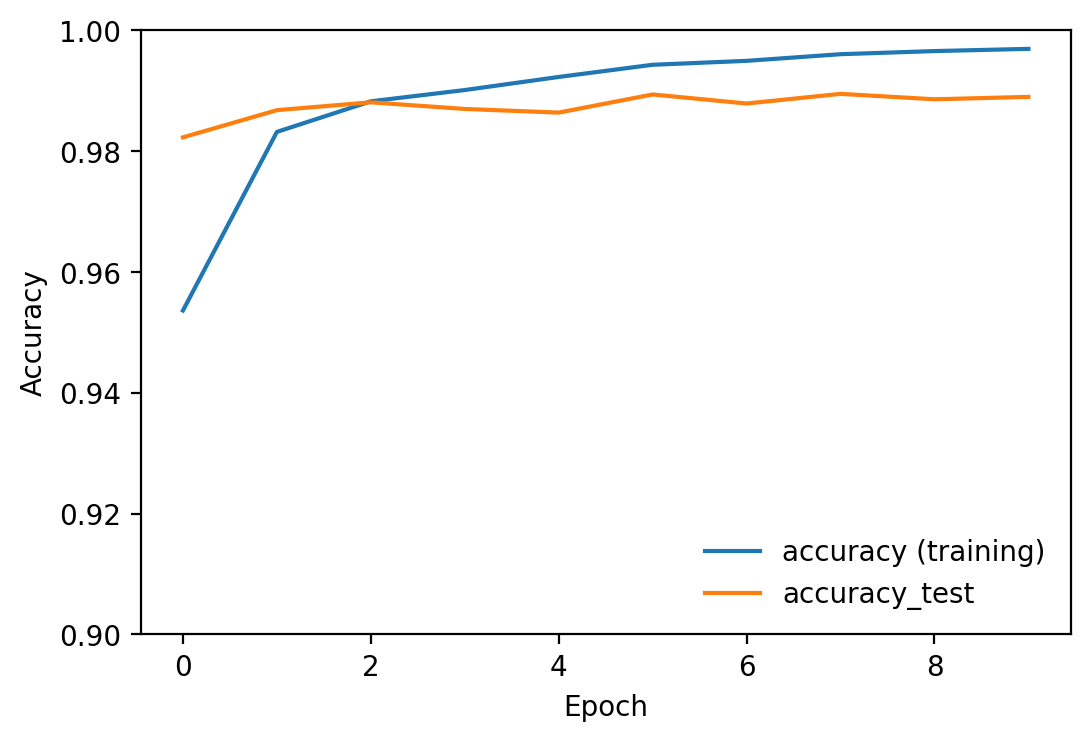

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (6, 6), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((3, 3)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 1
<p>M3. Conv (28,(4,4)), Pool (3,3), Hidden (64): test accuracy: 98.84%, parameters: 115,878
<p>M4  Conv (28,(6,6)), Pool (3,3), Hidden (64): test accuracy: 98.90%, parameters: 89,558
<p>Better test accuracy try Conv(28,(8,8))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1372)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                87872     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 90,342
Trainable params: 90,342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1528 - accuracy: 0.9548 - val_loss: 

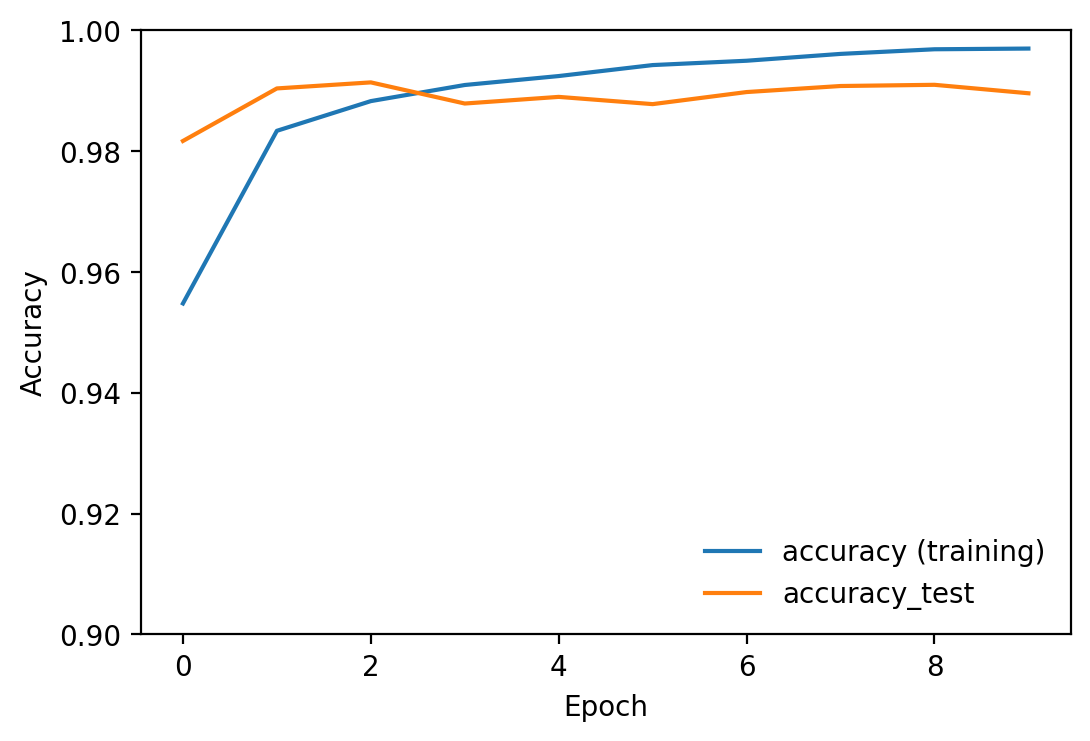

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((3, 3)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 1
<p>M3. Conv (28,(4,4)), Pool (3,3), Hidden (64): test accuracy: 98.84%, parameters: 115,878
<p>M4. Conv (28,(6,6)), Pool (3,3), Hidden (64): test accuracy: 98.90%, parameters: 89,558
<p>M5. Conv (8,8), Pool (3,3), Hidden (64): test accuracy: 98.96%, parameters: 
90,342
<p>Better test accuracy try Conv(28,(10,10))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 19, 19, 28)        2828      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                64576     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 68,054
Trainable params: 68,054
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1569 - accuracy: 0.9529 - val_loss: 

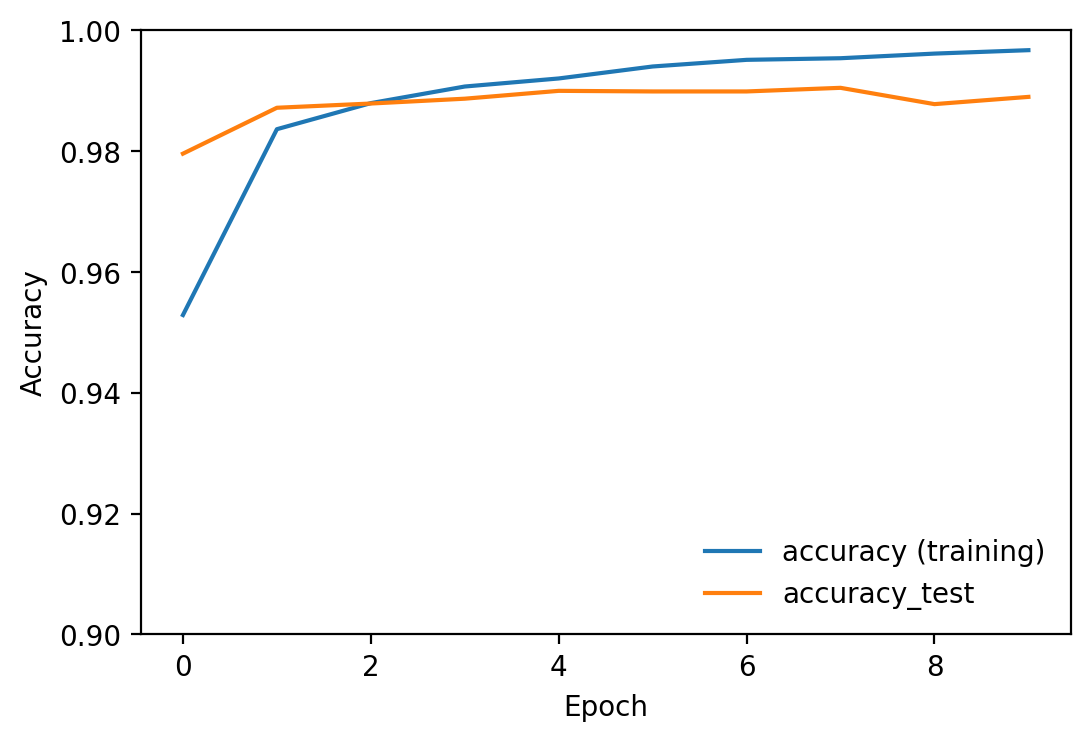

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (10, 10), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((3, 3)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
<p>M5. Conv (28,(8,8)), Pool (3,3), Hidden (64): test accuracy: 98.96%, parameters: 
90,342
<p>M6. Conv (28,(8,8), Pool (3,3), Hidden (64): test accuracy: 98.90%, parameters: 68,054

<p>Falling test accuracy therefore use M5, but alter pooling to (2,2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 28)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2800)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                179264    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 181,734
Trainable params: 181,734
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1390 - accuracy: 0.9589 - val_loss

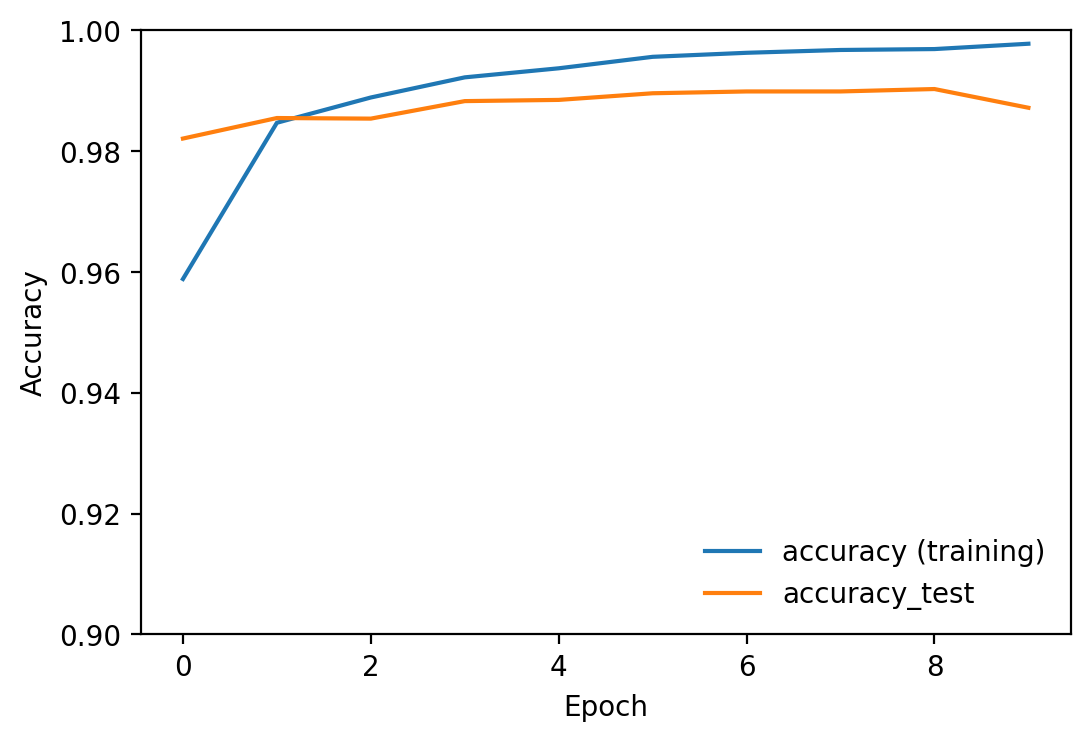

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((2, 2)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M5. Conv (28,(8,8)), Pool (3,3), Hidden (64): test accuracy: 98.96%, parameters: 90,342
<p>M7. Conv (28,(8,8)), Pool (2,2), Hidden (64): test accuracy: 98.72%, parameters: 181,734

<p>Decrease in test accuracy and c. doubling the number of parameters. Stick with M5 and try pool (4,4)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                44864     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 47,334
Trainable params: 47,334
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1733 - accuracy: 0.9506 - val_loss:

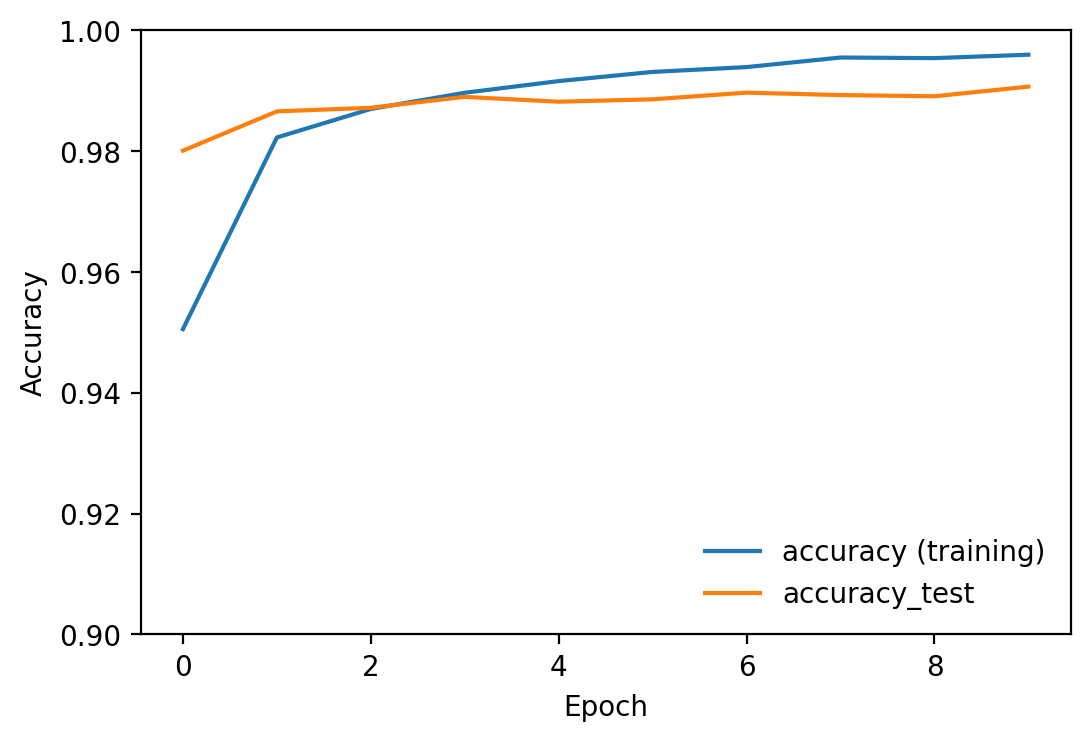

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M5. Conv (28,(8,8)), Pool (3,3), Hidden (64): test accuracy: 98.96%, parameters: 90,342
<p>M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334

Simpler model and improved test accuracy. Select M8 and try Pool (6,6)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 28)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 252)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                16192     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 18,662
Trainable params: 18,662
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2158 - accuracy: 0.9384 - val_loss:

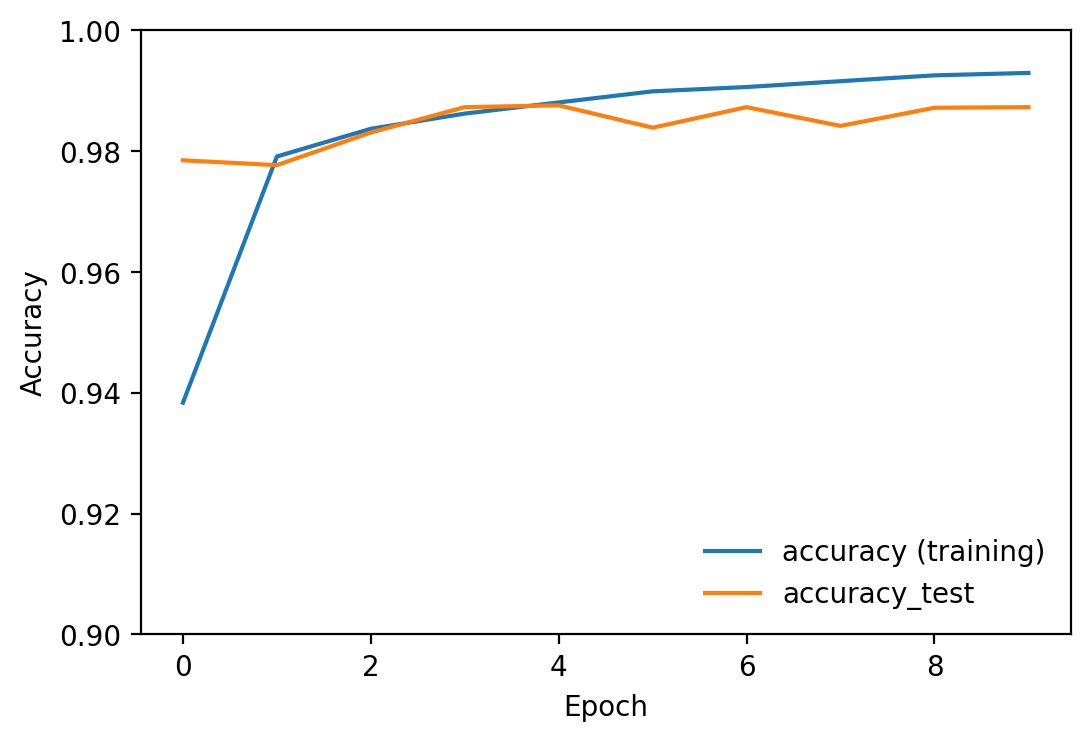

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((6, 6)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M9. Conv (28,(8,8)), Pool (6,6), Hidden (64): test accuracy: 98.73%, parameters: 18,662

Fall off in performance, select M8. Try adding a hidden layer of same size

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                44864     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 51,494
Trainable params: 51,494
Non-trainable params: 0
_________________________________________________

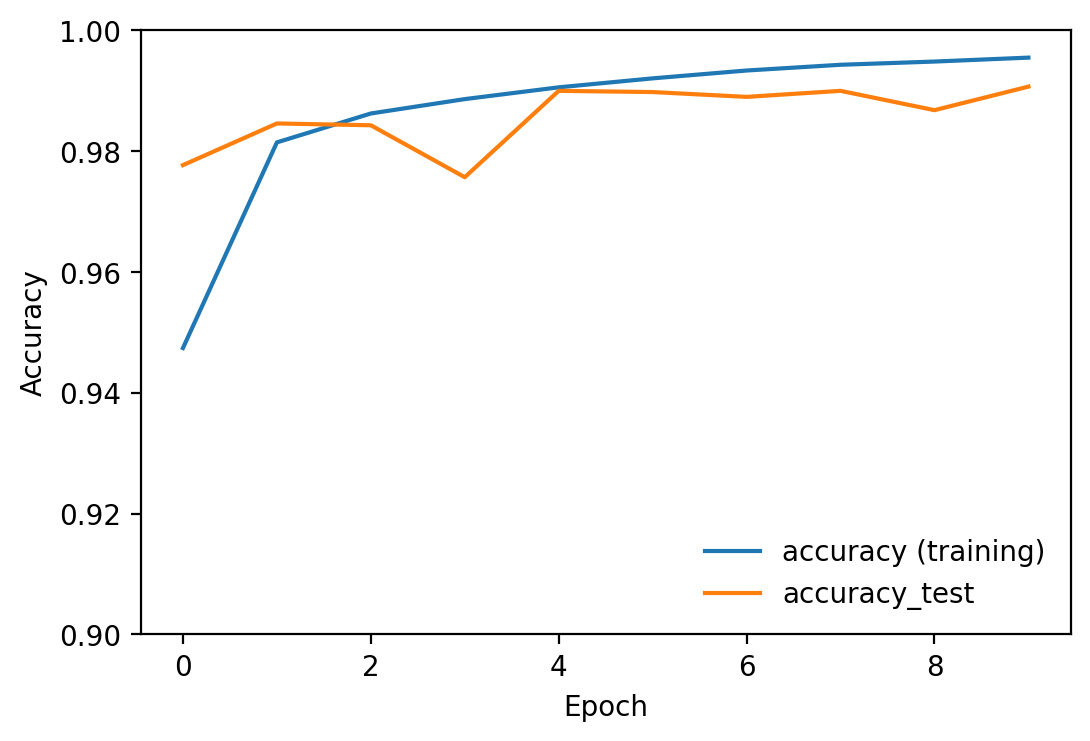

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M10 Conv (28,(8,8)), Pool (4,4), Hidden (64), Hidden (64): test accuracy: 99.07%, parameters: 51,494

Same performance: no need for extra layer. Stick with M8, but try to widen M8 hidden layer to 128.

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               89728     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 92,838
Trainable params: 92,838
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1546 - accuracy: 0.9538 - val_loss:

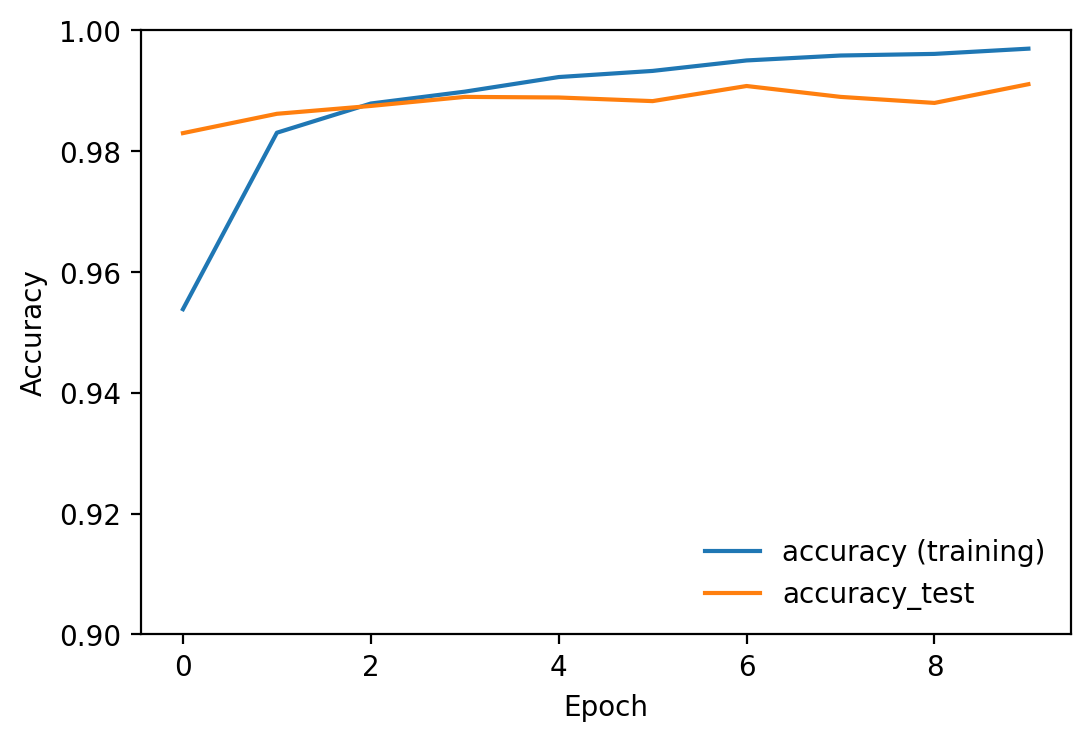

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1

M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M11 Conv (28,(8,8)), Pool (4,4), Hidden (128): test accuracy: 99.11%, parameters: 92,838

<p>Small improvement in accuracy, but c. double the complexity. Stick with M8. Try Hidden (32)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                22432     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 24,582
Trainable params: 24,582
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2118 - accuracy: 0.9393 - val_loss:

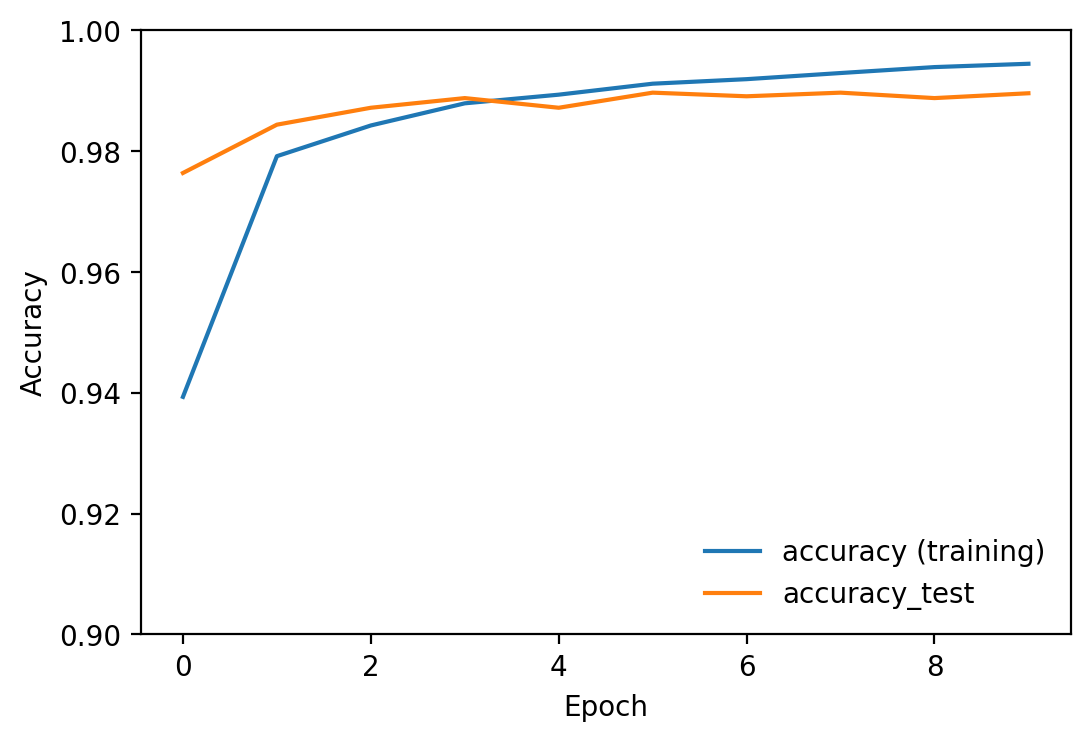

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M12 Conv (28,(8,8)), Pool (4,4), Hidden (32): test accuracy: 98.96%, parameters: 24,582

Test accuracy falls off. Stick with M8. Add a dropout layer into the network to add some noise (20%).

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                44864     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 47,334
Trainable params: 47,334
Non-trainable params: 0
_________________________________________________

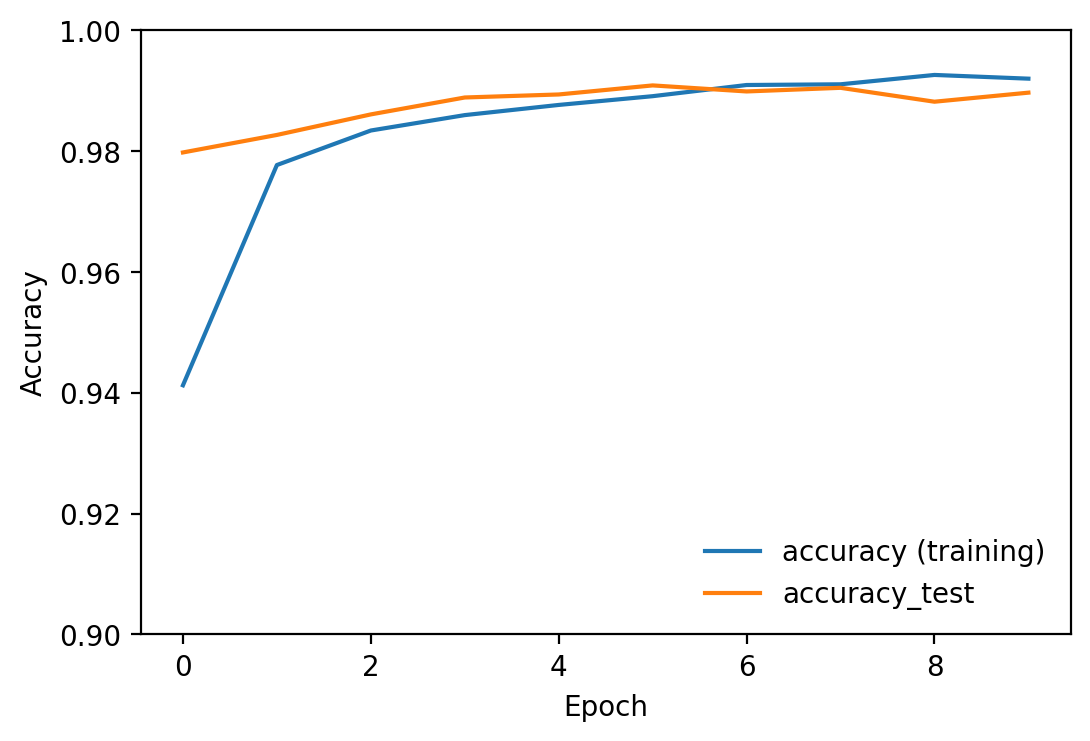

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M13 Conv (28,(8,8)), Pool (4,4), Hidden (64), Drop(0.2): test accuracy: 98.97%, parameters: 47,334

Dropout layer did not improve on the performance of the model, so M8 is still the selected model. As a final test, it was decided to reduce the number of features in the convolution layer from 28 to 14.


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 21, 21, 14)        910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 14)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 350)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                22464     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 24,024
Trainable params: 24,024
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2254 - accuracy: 0.9355 - val_loss:

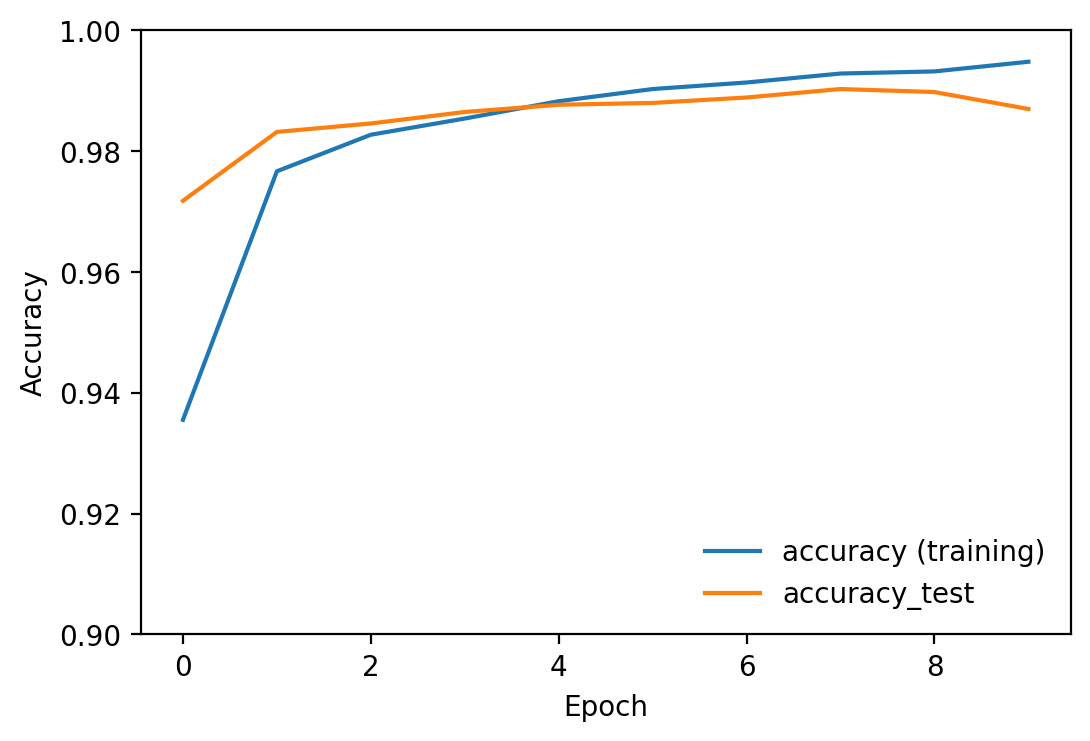

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(14, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 1
M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>M14 Conv (14,(8,8)), Pool (4,4), Hidden (64): test accuracy: 98.70%, parameters: 47,334

Reducing the number of features decreases the test accuracy (unsurpringly). There was not time to optimise on this further, so M8 remained the selected model.


#Task 1 Conclusions.
Best accuracy:
<p>M11 Conv (28,(8,8)), Pool (4,4), Hidden (128): test accuracy: 99.11%, parameters: 92,838

**Selected model**, with similar accuracy but much simpler:
<p>M8. Conv (28,(8,8)), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334

With one convolutional layer it was possible to achieve test accuracies of 99.1%. This shows the value of their inclusion in neural network design. Combining them with pooling layers helps reduce the complexity of the network in terms of numbers of parameters and speed. By observation of different runs, test accuracies can be higher at earlier epochs and then drop off. This may be the result of overfitting and it would be good practice to average results obtained over several runs (time did not allow it on this occasion). 

# Task 2
Use M8 and add a convolution layer of same design (28,(8,8)) and a pool layer (2,2). Change existing pool later to (2,2) from (4,4). Otherwise, pooling would scale down too much for size of images.

Call new model N1. Will assume number of features = 28 in convolution layer unless stated and will refer to such a layer as Conv(x,x). 

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 21, 21, 28)        1820      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 28)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 28)          50204     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 28)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 28)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                1856      
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

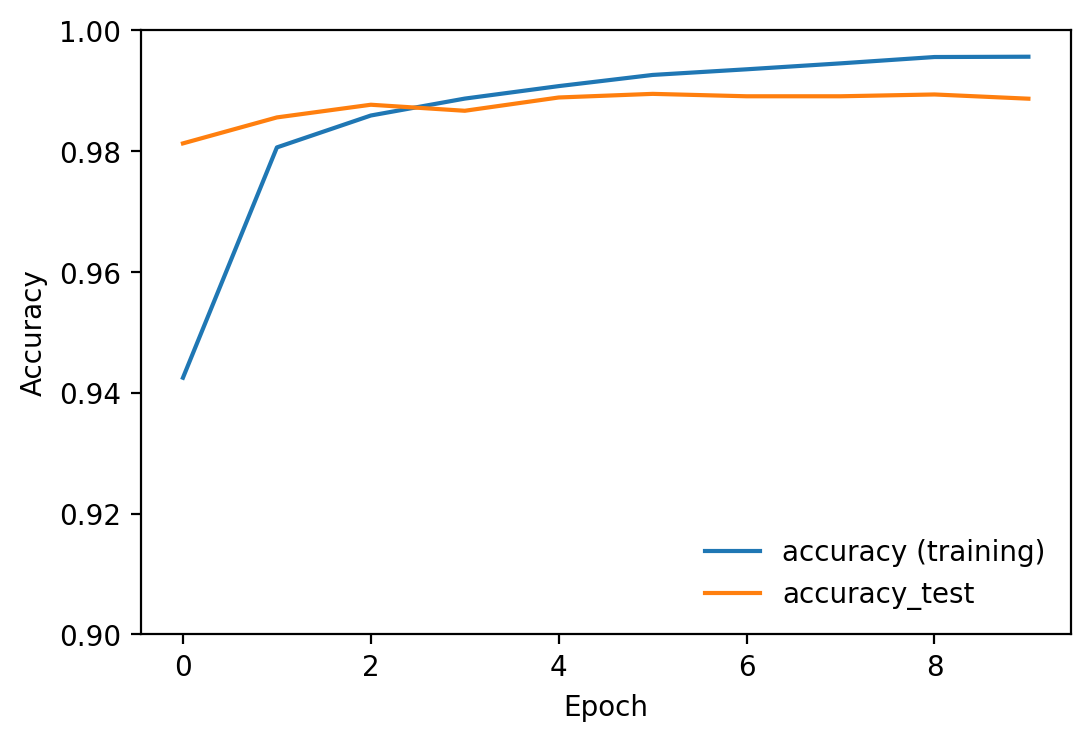

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((2, 2)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (8, 8), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((2, 2)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 2

M8. Conv (8,8), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334
<p>N1. Conv(8,8), Pool (2,2), Conv(8,8), Pool (2,2), Hidden (64): test accuracy: 98.87%, parameters: 54,530.

Showed a lower performance than single layer. Perhaps operation of (8,8) kernal twice is too much. Try 2 (4,4) kernels and put single (4,4) pool afterwards.

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 700)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                44864     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                650       
Total params: 58,562
Trainable params: 58,562
Non-trainable params: 0
_________________________________________________

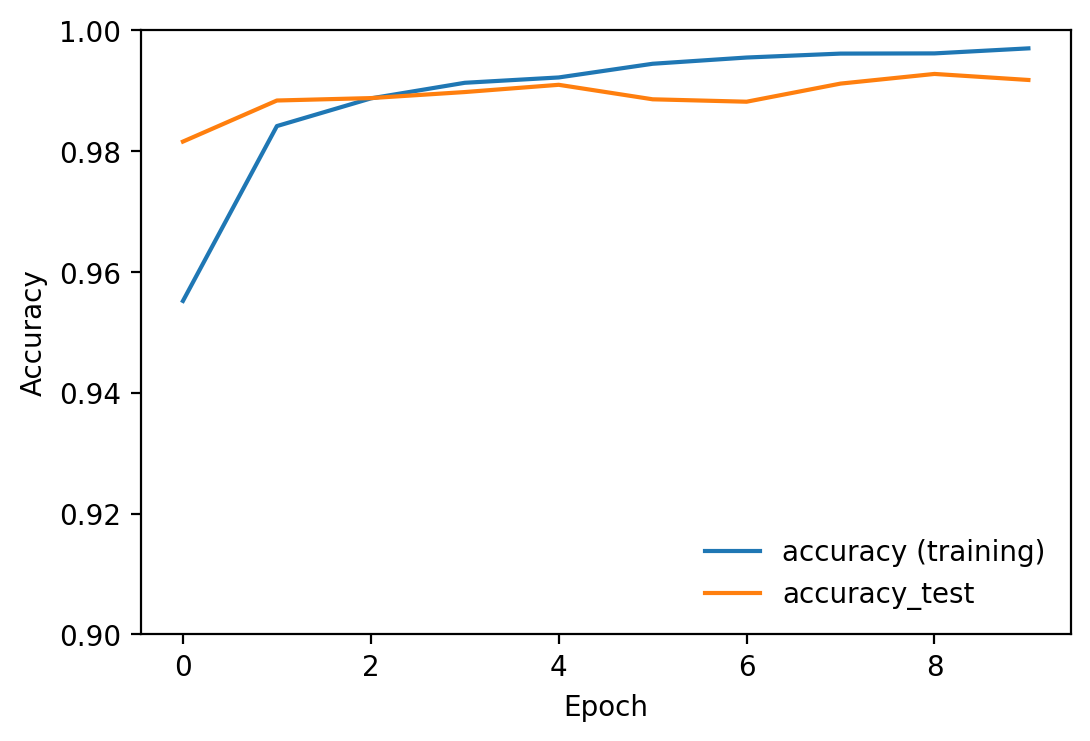

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 2

M8. Conv (8,8), Pool (4,4), Hidden (64): test accuracy: 99.07%, parameters: 47,334

N1. Conv(8,8), Pool (2,2), Conv(8,8), Pool (2,2), Hidden (64): test accuracy: 98.27%, parameters: 54,530.

N2. Conv(4,4), Conv(4,4), Pool (4,4), Hidden (64): test accuracy: 99.18%, parameters: 58,562.

This is best performance so far: M11 (99.07%). Select N2. Try a small kernel size (2,2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 28)        140       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 28)        3164      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1008)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                64576     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 68,530
Trainable params: 68,530
Non-trainable params: 0
____________________________________________________

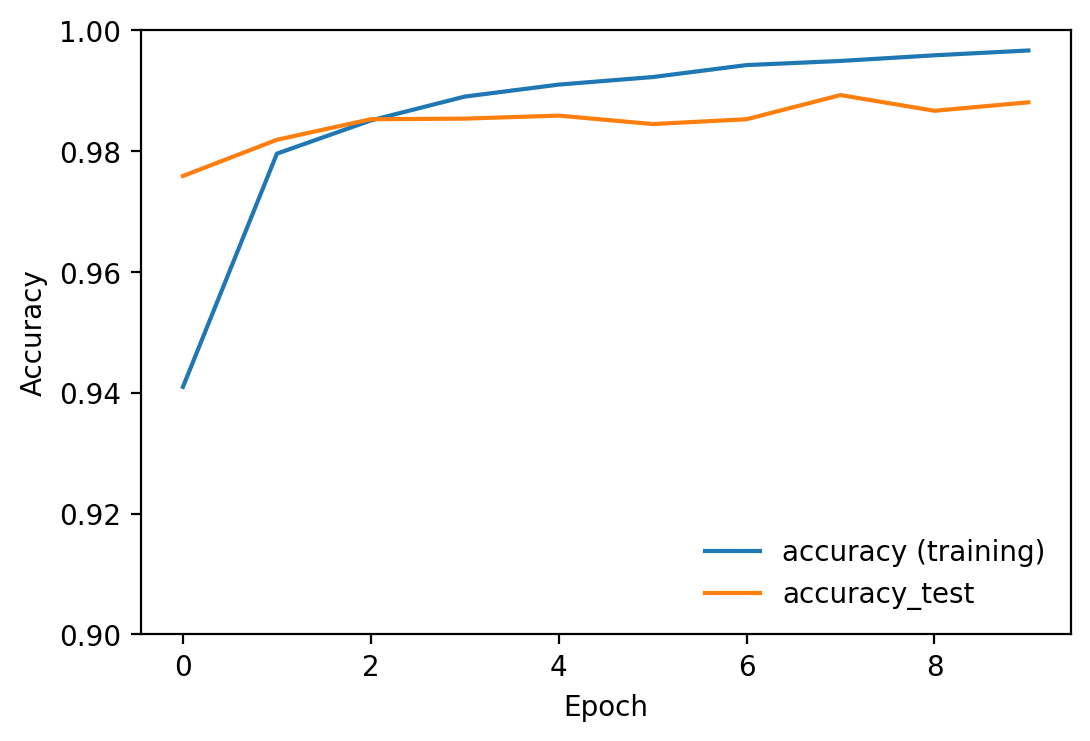

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (2, 2), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (2, 2), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 2
N2. Conv(4,4), Conv(4,4), Pool (4,4), Hidden (64): test accuracy: 99.18%, parameters: 58,562.

N3. Conv(2,2), Conv(2,2), Pool (4,4), Hidden (64): test accuracy: 98.81%, 68,530

Worse than N2. Try without any pooling.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 28)        140       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 28)        3164      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18928)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1211456   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,215,410
Trainable params: 1,215,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1434 - accuracy: 0.9563 - val_

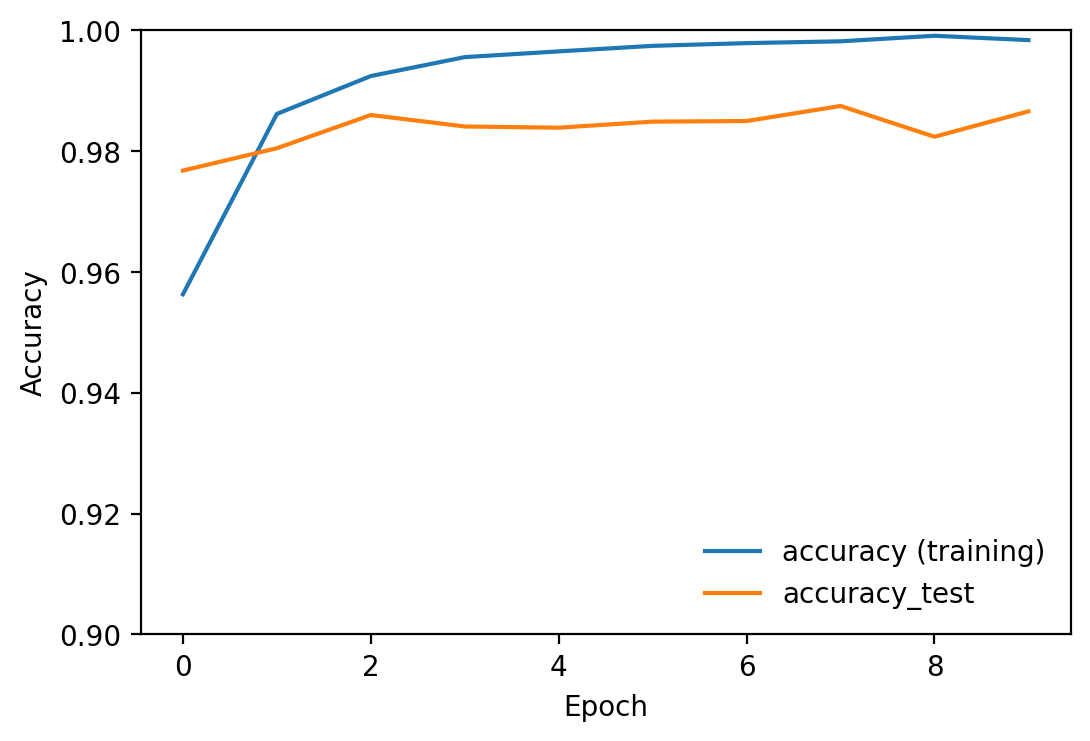

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (2, 2), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (2, 2), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
#model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 2
N2. Conv(4,4), Conv(4,4), Pool (4,4), Hidden (64): test accuracy: 99.18%, parameters: 58,562.

N4. Conv(2,2), Conv(2,2), Hidden (64): test accuracy: 98.66%, parameters: 1,215,410

Worse than N2. Try N2 with dropout (50%)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 28)          0         
_________________________________________________________________
flatten (Flatten)            (None, 700)               0         
_________________________________________________________________
dropout (Dropout)            (None, 700)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                44864     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

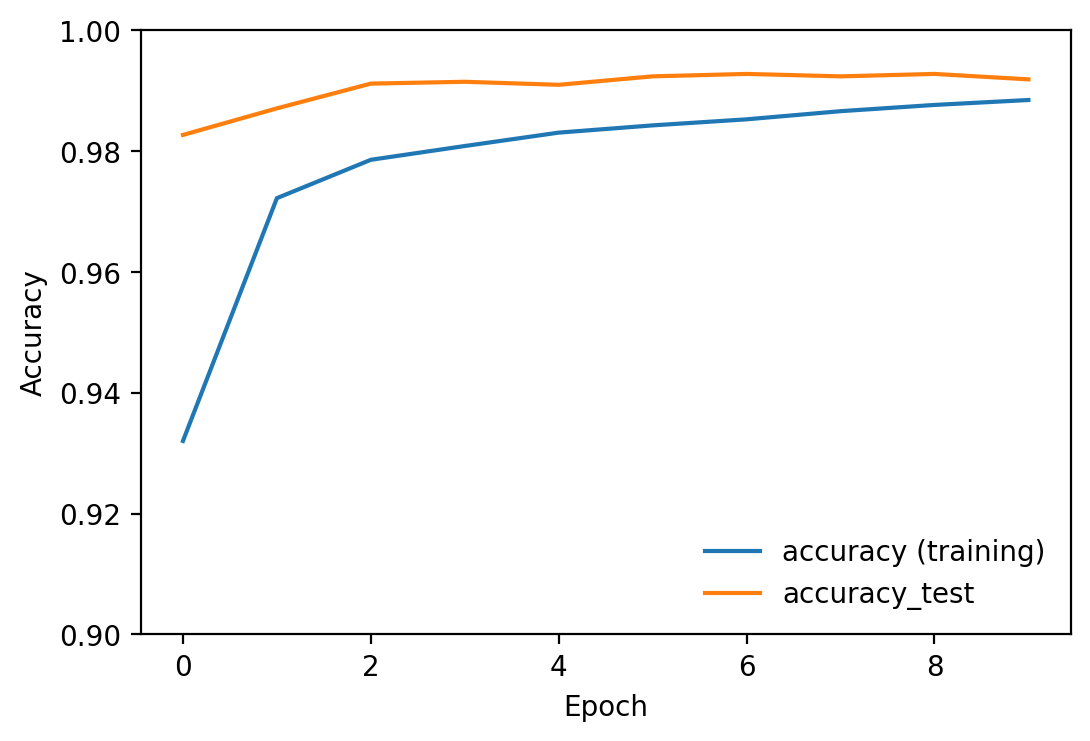

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 2
N2. Conv(4,4), Conv(4,4), Pool (4,4), Hidden (64): test accuracy: 99.18%, parameters: 58,562.
<p>N5. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.5) Hidden (64): 99.19%, parameters: 58,562

Small improvement in performance, took a long time to run though. Nevertheless N5 selected. Try reducing Dropout to 0.25.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 700)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                44864     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

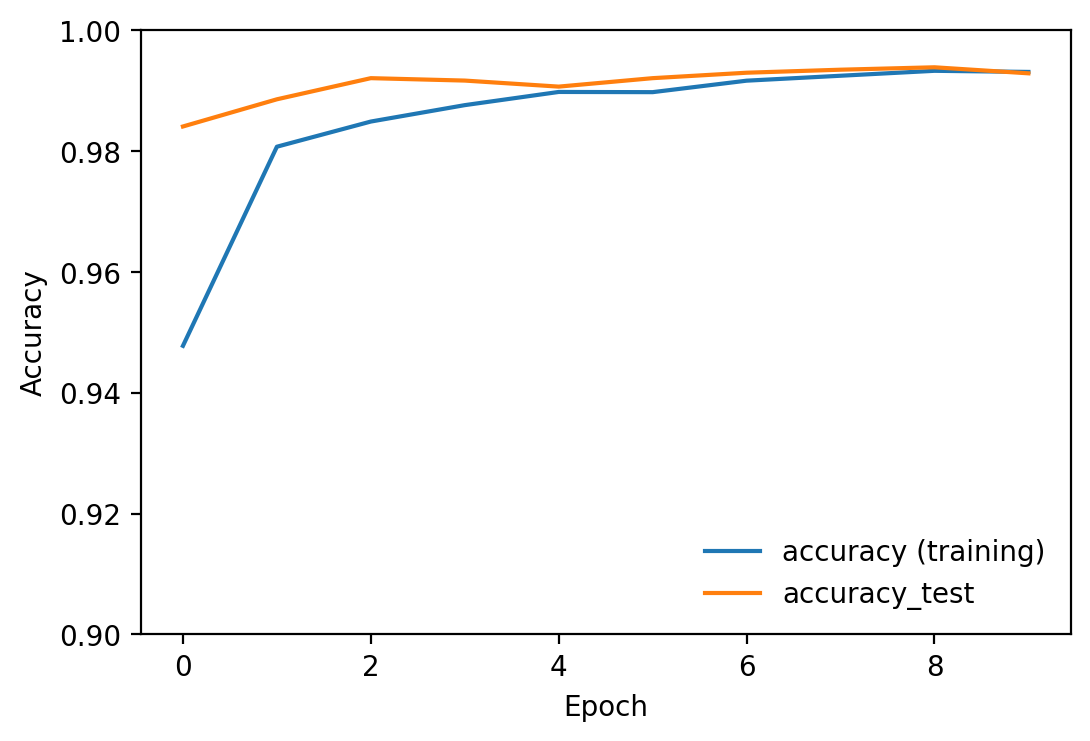

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Task 2
N5. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.5) Hidden (64): 99.19%, parameters: 58,562

N6. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.25) Hidden (64): 99.29%, parameters: 58,562

A decent improvement in performance. Dropout rate seems a good variable to optimise on. Try 0.35.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 700)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                44864     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

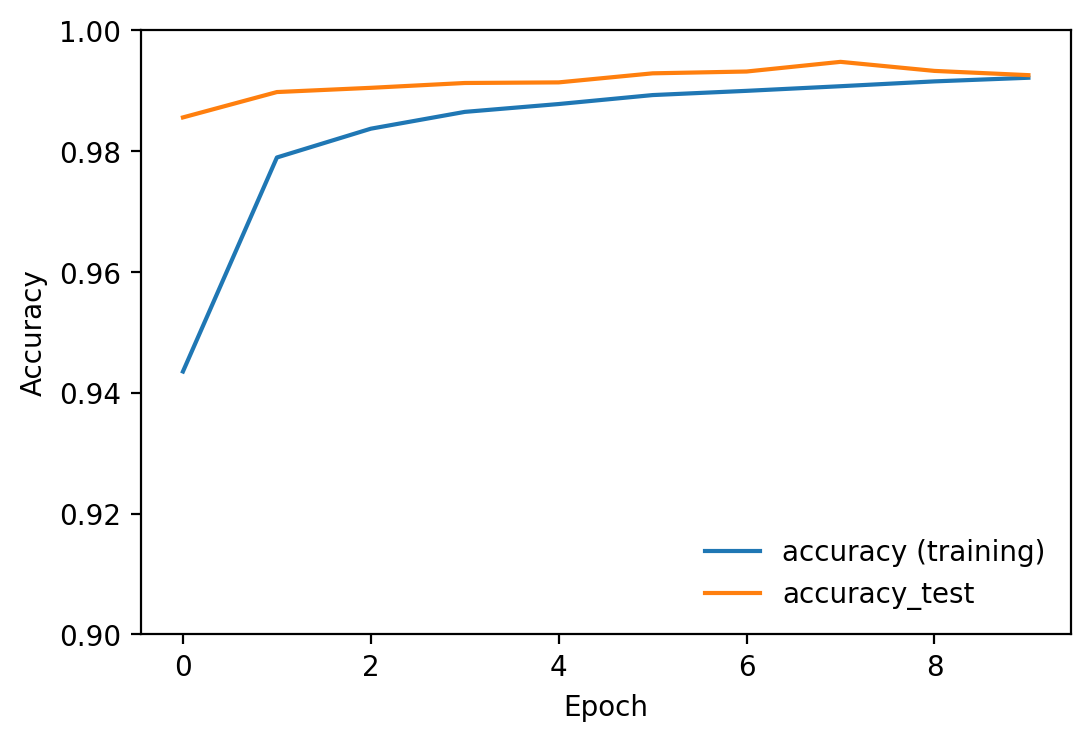

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 2
N6. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.25) Hidden (64): 99.29%, parameters: 58,562

N7. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.35) Hidden (64): 99.26%, parameters: 58,562

Slightly worse performance. Try Dropout = 0.15

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 700)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                44864     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

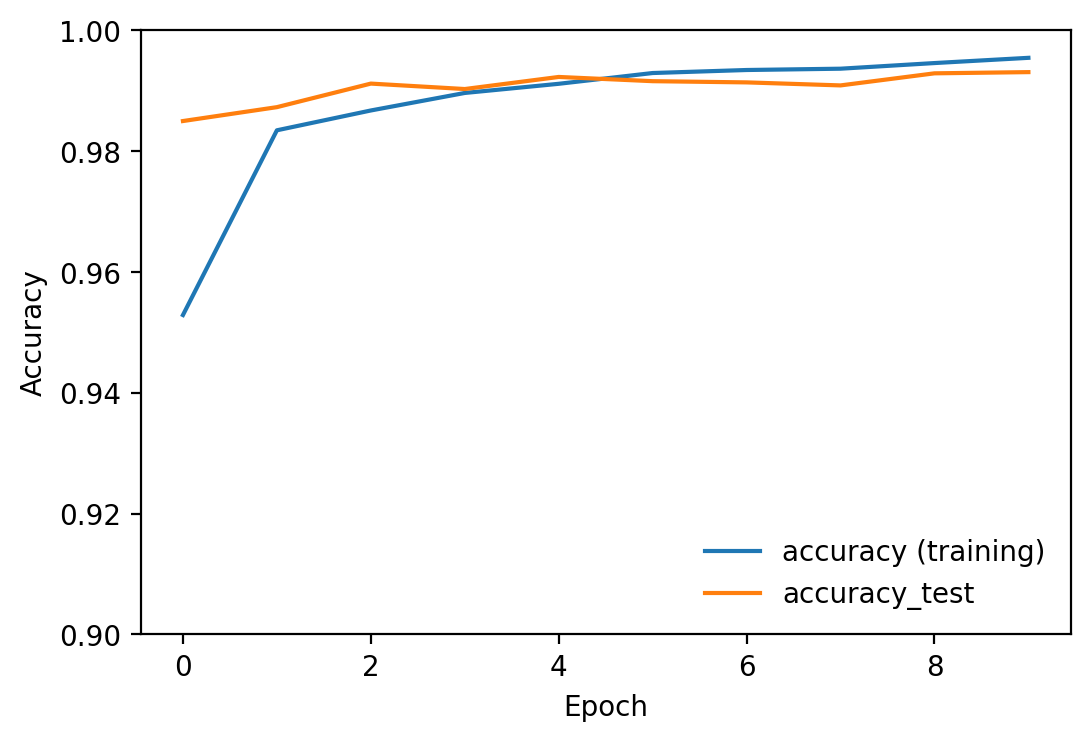

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 2

N6. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.25) Hidden (64): 99.29%, parameters: 58,562

N8. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.15) Hidden (64): 99.31%, parameters: 58,562

Try one last one at Dropout = 0.20

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 28)        476       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 28)        12572     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 700)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                44864     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

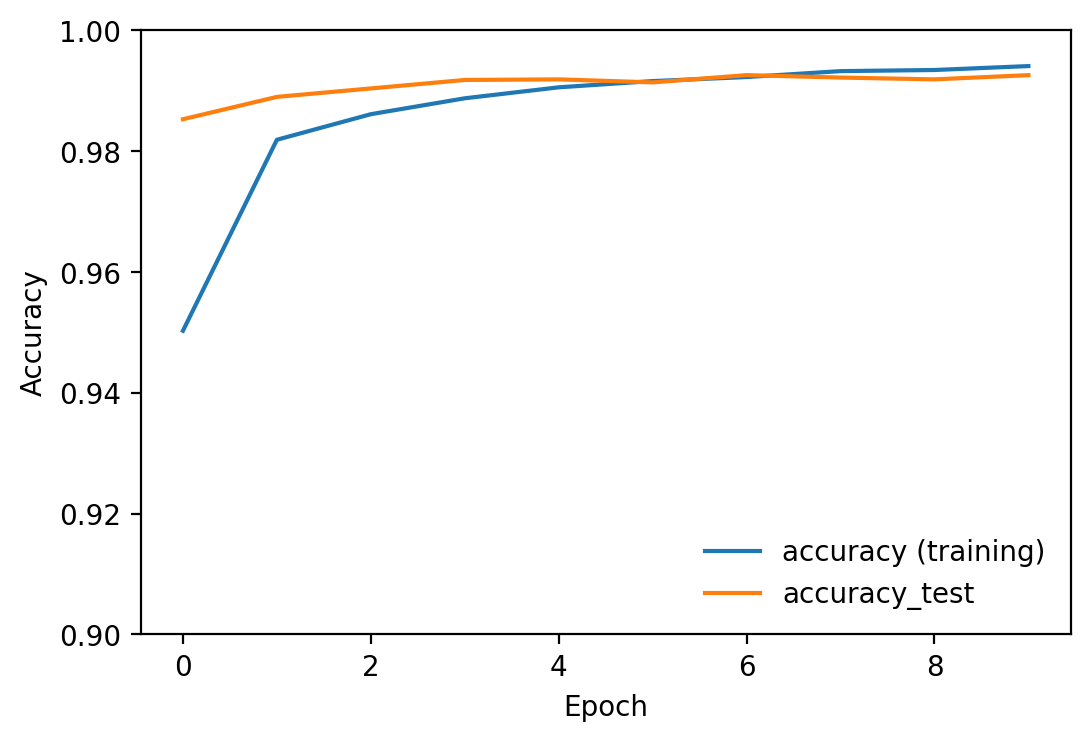

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Conv2D(28, (4, 4), activation='relu', input_shape=(28, 28,1)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.MaxPooling2D((4, 4)))#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))#reduced neurons from 128 to 64
model.add(keras.layers.Dense(10))#copied from Week3_MNIST_TF.ipynb
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Task 2
N8. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.15) Hidden (64): 99.31%, parameters: 58,562

N9. Conv(4,4), Conv(4,4), Pool (4,4), Dropout(0.20) Hidden (64): 99.26%, parameters: 58,562

# Conclusions
Model selected for Task2 is N8 with an accuracy of above 99.3%, so an improvement on 99.1% obtained with a single layer. The addition of a dropout layer worked well, this feaure had not worked well with the one layer CNN. As much time was spent optimizing on dropout, further convolutional layers could not be considered.

# Aside
While waiting for batches to run, an interesting webpage was found:
<p>https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
<p>The page explains the testing steps in finding the right model structure: first, deciding the number of convolutional layers, then how many feature maps, then how large the dense layer, the how much dropout. In addition, they use "advanced features" like batch normalisation (presumably the relu can take you away from 0-1 range), using 2 (3,3) convolution layers in series to mimic one (5,5). They also suggest using data augmentation techniques: e.g. using tranformations like translating, rotating and shearing images. I copied and adapted their model, but without the implementation of data augmentation (see below). This model acheived a test accuracy of 99.50%. Near 100% it gets harder and harder to improve test accuracies. 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_18 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)       

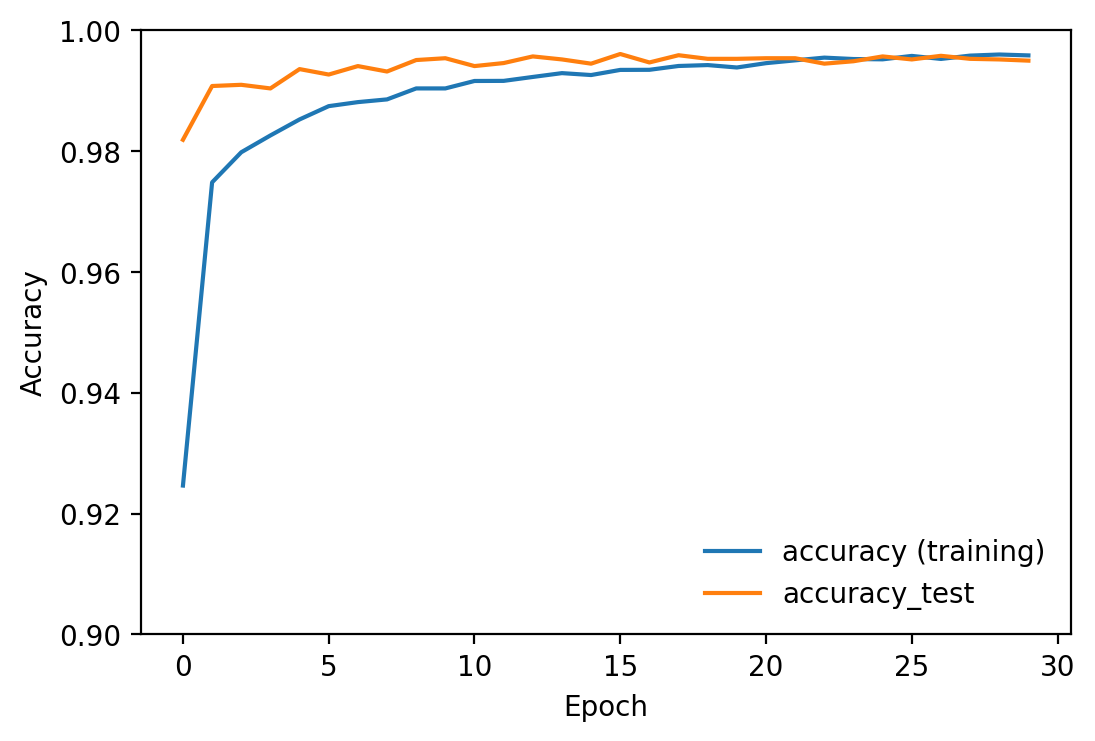

In [ ]:
#model copied and adapted from https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))
#adapted from Week4_ConvolutionalNeuralNetwork.ipynb
plt.plot(history.history['accuracy'], label='accuracy (training)')
plt.plot(history.history['val_accuracy'], label = 'accuracy_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)